# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset

In [3]:
df = pd.read_csv('diabetes.csv')

# Getting to know your data

In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.index

RangeIndex(start=0, stop=768, step=1)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The Pima Indians Diabetes Dataset:

Involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.
It is a binary (2-class) classification problem. 
The number of observations for each class is not balanced. 
There are 768 observations with 9 input variables and 1 output variable. 

The variable names are as follows:

    0. num_peg: Number of times pregnant.
    1. glucose_conc: Plasma glucose concentration.
    2. diastolic_bp: Diastolic blood pressure (mm Hg).
    3. thickness: Triceps skinfold thickness (mm).
    4. insulin:    2-Hour serum insulin (mu U/ml).
    5. bmi: Body mass index (weight in kg/(height in m)^2).
    6. diab_pred: Diabetes pedigree function.
    7. age: Age (years).
    8. diabetes: Class variable (0 or 1).
Variable classification:

Quantitative:

    1. glucose_conc: Plasma glucose concentration.
    2. diastolic_bp: Diastolic blood pressure (mm Hg).
    3. thickness: Triceps skinfold thickness (mm).
    4. insulin:    2-Hour serum insulin (mu U/ml).
    5. bmi: Body mass index (weight in kg/(height in m)^2).
    6. diab_pred: Diabetes pedigree function.

Categorical:

    0. num_peg: Number of times pregnant.
    7. age: Age (years).
    8. diabetes: Class variable (0 or 1).

In [9]:
truedf= df.loc[df['Outcome']==1]

In [10]:
len(truedf)

268

In [11]:
truedf.mean()

Pregnancies                   4.865672
Glucose                     141.257463
BloodPressure                70.824627
SkinThickness                22.164179
Insulin                     100.335821
BMI                          35.142537
DiabetesPedigreeFunction      0.550500
Age                          37.067164
Outcome                       1.000000
dtype: float64

In [12]:
falsedf= df.loc[df['Outcome']==0]

In [13]:
len(falsedf)

500

In [14]:
falsedf.mean()

Pregnancies                   3.298000
Glucose                     109.980000
BloodPressure                68.184000
SkinThickness                19.664000
Insulin                      68.792000
BMI                          30.304200
DiabetesPedigreeFunction      0.429734
Age                          31.190000
Outcome                       0.000000
dtype: float64

# Data Preprocessing

Handling missing values

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Univariate Analysis

Statistical Analysis

1.It includes finding the central tendencies like mean, median, mode, frequency table, range, std deviation etc.
2.Distribution of individual variables.

Graphical Analysis

1.Histogram
2.KDE Plot
3.Box Plot
4.Violin Plot
5.Bar Chart
6.Pie Chart

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
df['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

In [18]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [19]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

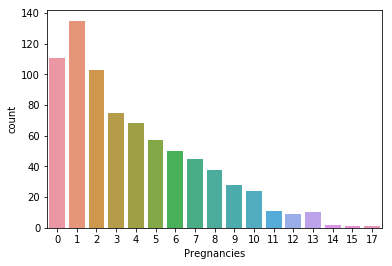

In [20]:
sns.countplot(df['Pregnancies'])

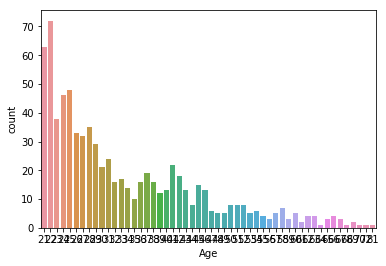

In [21]:
sns.countplot(df['Age'])

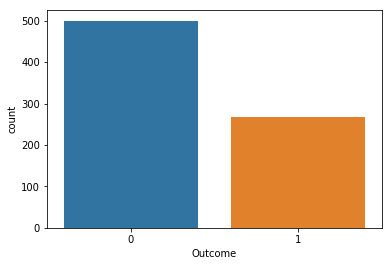

In [22]:
sns.countplot(df['Outcome'])

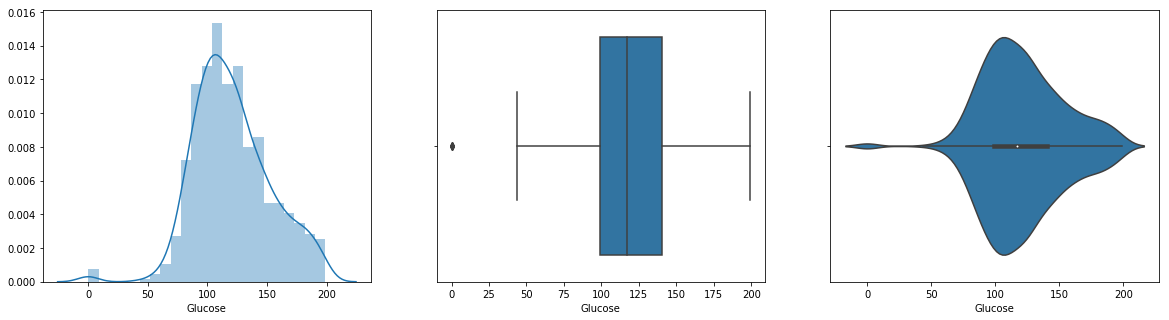

In [23]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sns.distplot(df['Glucose'])
plt.subplot(1,3,2)
sns.boxplot(df['Glucose'])
plt.subplot(1,3,3)
sns.violinplot(df['Glucose'])

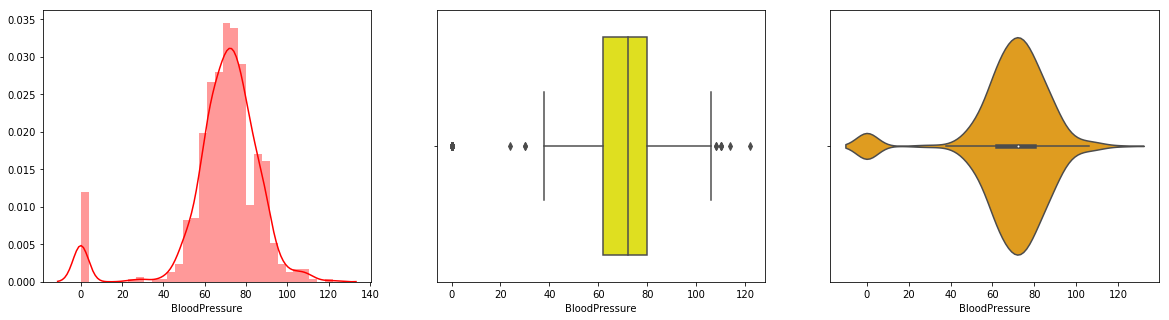

In [24]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sns.distplot(df['BloodPressure'], color = 'red')
plt.subplot(1,3,2)
sns.boxplot(df['BloodPressure'], color = 'yellow')
plt.subplot(1,3,3)
sns.violinplot(df['BloodPressure'], color = 'orange')

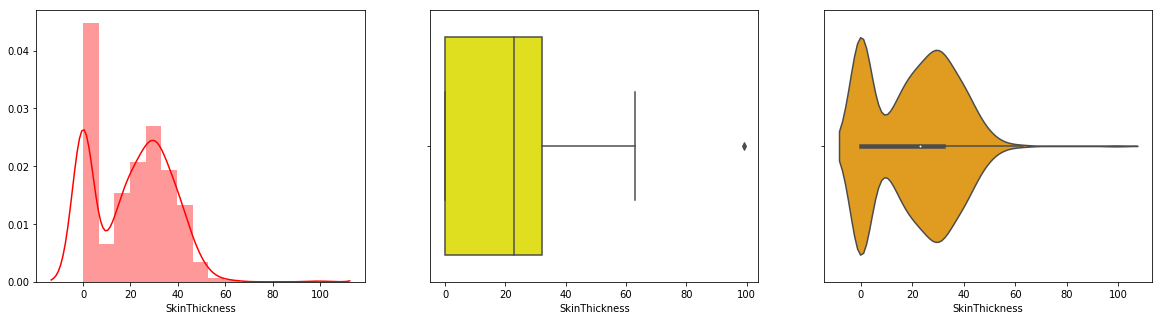

In [25]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sns.distplot(df['SkinThickness'], color = 'red')
plt.subplot(1,3,2)
sns.boxplot(df['SkinThickness'], color = 'yellow')
plt.subplot(1,3,3)
sns.violinplot(df['SkinThickness'], color = 'orange')

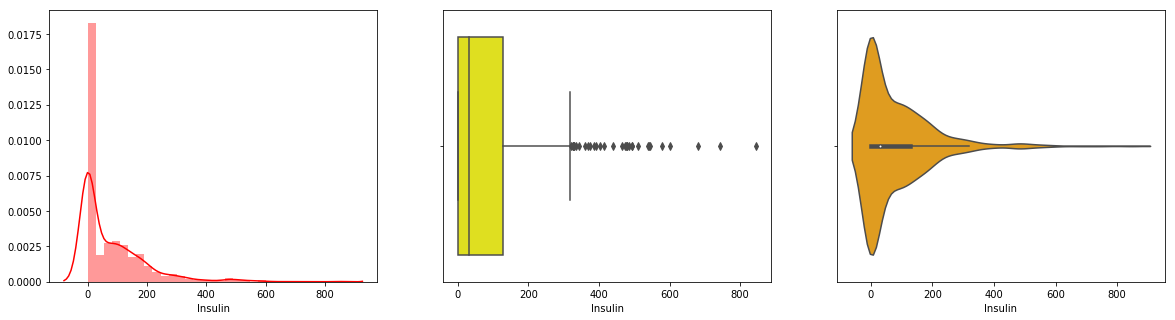

In [26]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sns.distplot(df['Insulin'], color = 'red')
plt.subplot(1,3,2)
sns.boxplot(df['Insulin'], color = 'yellow')
plt.subplot(1,3,3)
sns.violinplot(df['Insulin'], color = 'orange')

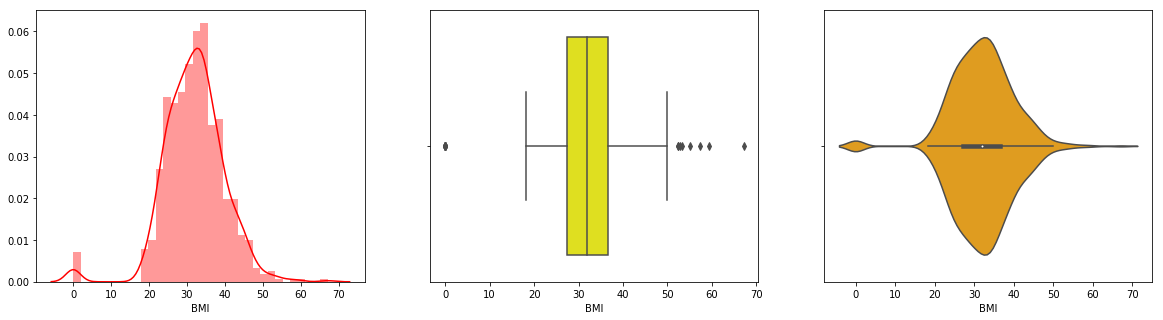

In [27]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sns.distplot(df['BMI'], color = 'red')
plt.subplot(1,3,2)
sns.boxplot(df['BMI'], color = 'yellow')
plt.subplot(1,3,3)
sns.violinplot(df['BMI'], color = 'orange')

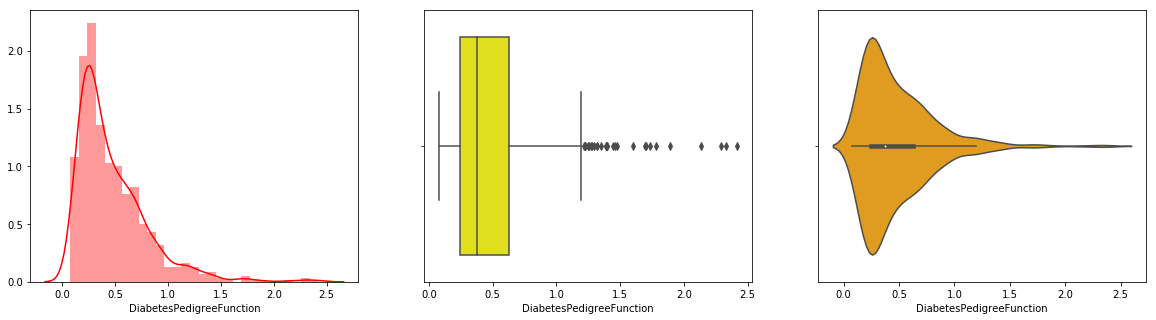

In [28]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sns.distplot(df['DiabetesPedigreeFunction'], color = 'red')
plt.subplot(1,3,2)
sns.boxplot(df['DiabetesPedigreeFunction'], color = 'yellow')
plt.subplot(1,3,3)
sns.violinplot(df['DiabetesPedigreeFunction'], color = 'orange')

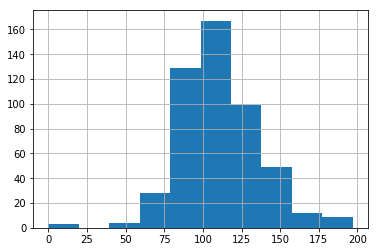

In [29]:
df.loc[df['Outcome'] == 0, 'Glucose'].hist()

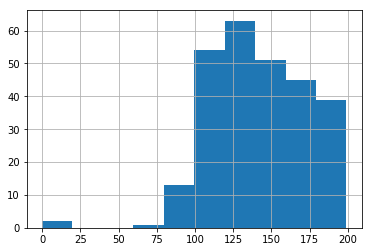

In [30]:
df.loc[df['Outcome'] == 1, 'Glucose'].hist()

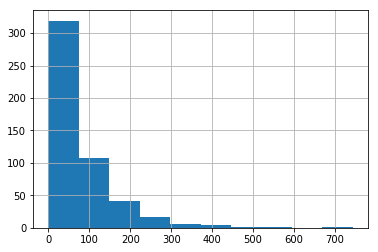

In [31]:
df.loc[df['Outcome'] == 0, 'Insulin'].hist()

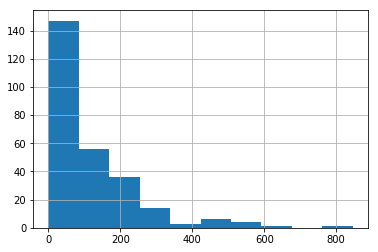

In [33]:
df.loc[df['Outcome'] == 1, 'Insulin'].hist()

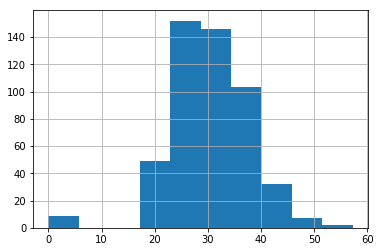

In [34]:
df.loc[df['Outcome'] == 0, 'BMI'].hist()

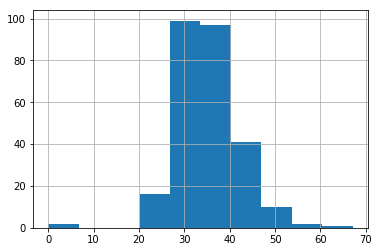

In [35]:
df.loc[df['Outcome'] == 1, 'BMI'].hist()

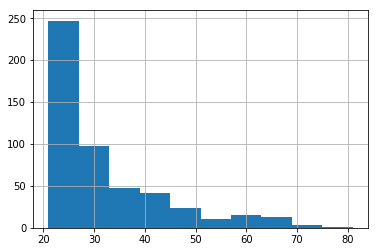

In [36]:
df.loc[df['Outcome'] == 0, 'Age'].hist()

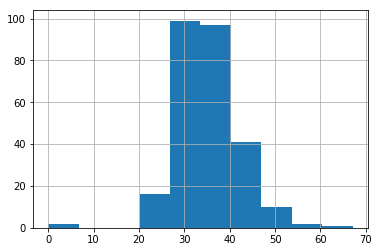

In [37]:
df.loc[df['Outcome'] == 1, 'BMI'].hist()

# Bivariate Analysis

Statistical Analysis

It includes finding relation between two variables like

Quantitative-Quantitave:
    Finding the karl-pearson-coefficient(r) values.
Quantitative-Categorical:
    Finding the Contingency Table

Graphical Analysis

Quantitative-Quantitave
    1. Scatter plot
    2. Correlation Heatmap

Quantitative-Categorical
    1. Scatter plot
    2. Count Plot
    3. Box Plot
    4. KDE Plot
    5. lmplot
    6. Strip Plot
    7. Swarm Plot

In [39]:
corr_matrix = df.corr()
print(corr_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [40]:
pd.crosstab(df['Outcome'], df['Pregnancies'])

Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
Outcome,,,,,,,,,,,,,,,,,
0,73,106,84,48,45,36,34,20,16,10,14,4,5,5,0,0,0
1,38,29,19,27,23,21,16,25,22,18,10,7,4,5,2,1,1


In [41]:
pd.crosstab(df['Outcome'], df['Age'])

Age,21,22,23,24,25,26,27,28,29,30,...,63,64,65,66,67,68,69,70,72,81
Outcome,,,,,,,,,,,,,,,,,,,,,
0,58,61,31,38,34,25,24,25,16,15,...,4,1,3,2,2,1,2,0,1,1
1,5,11,7,8,14,8,8,10,13,6,...,0,0,0,2,1,0,0,1,0,0


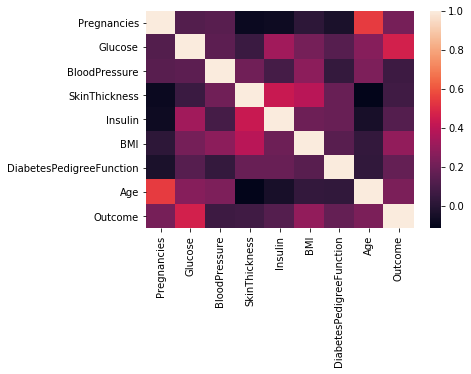

In [42]:
sns.heatmap(corr_matrix)

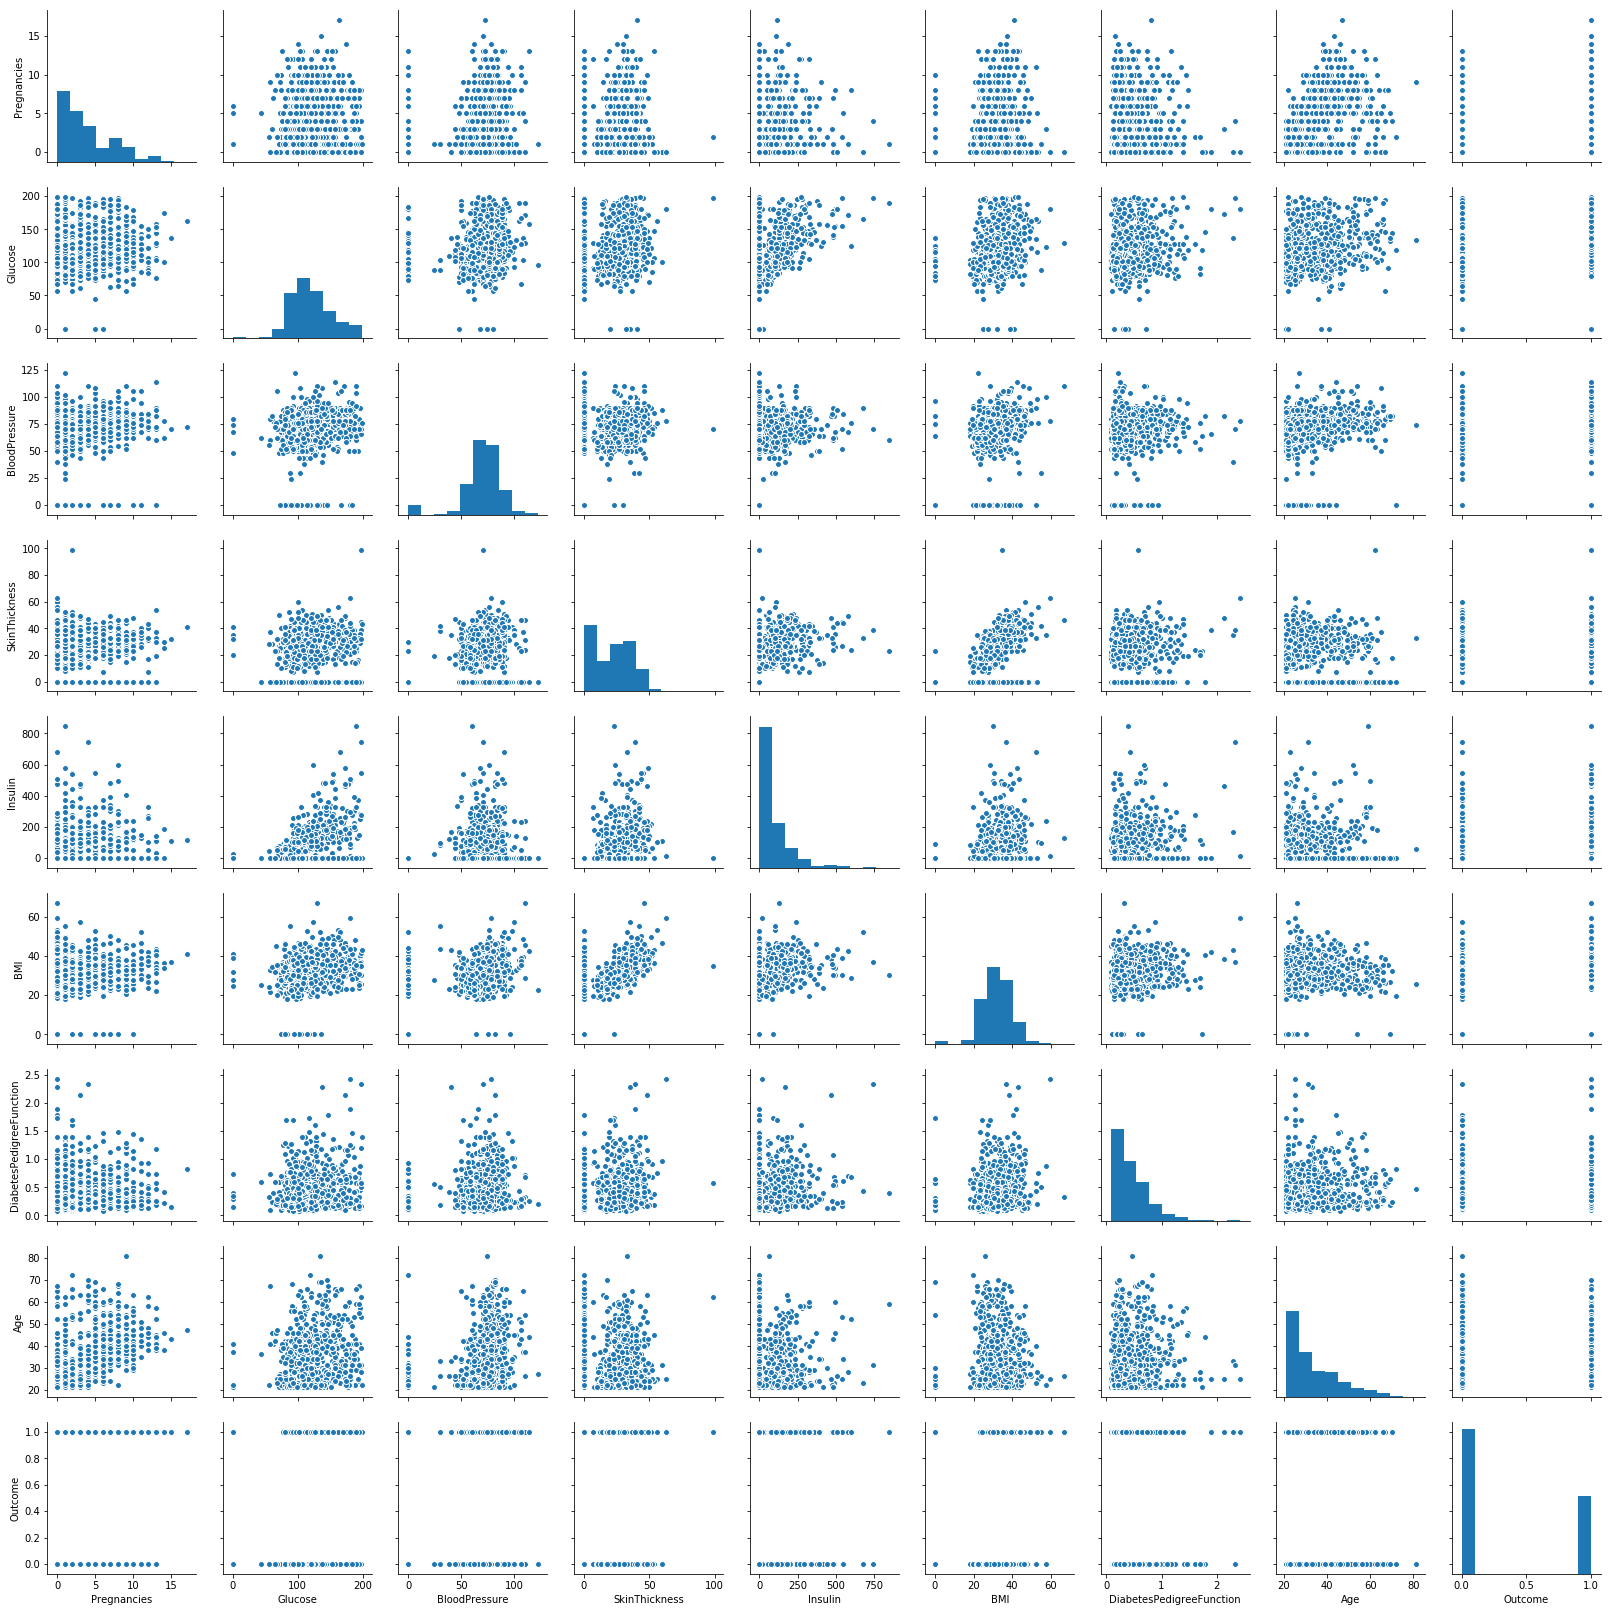

In [43]:
sns.pairplot(df)

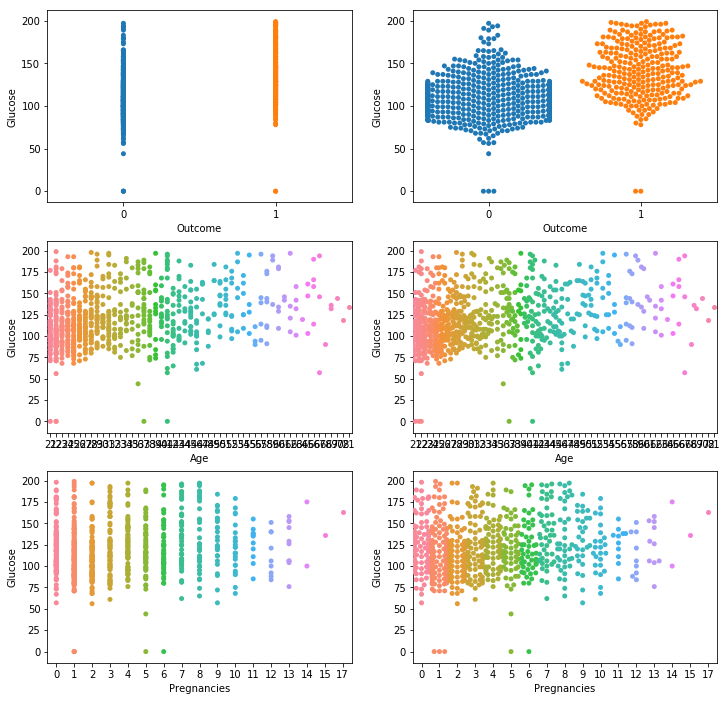

In [44]:
plt.figure(figsize = (12, 12))
plt.subplot(3,2,1)
sns.stripplot(y = 'Glucose', x = 'Outcome', data = df)
plt.subplot(3,2,2)
sns.swarmplot(y = 'Glucose', x = 'Outcome', data = df)
plt.subplot(3,2,3)
sns.stripplot(y = 'Glucose', x = 'Age', data = df)
plt.subplot(3,2,4)
sns.swarmplot(y = 'Glucose', x = 'Age', data = df)
plt.subplot(3,2,5)
sns.stripplot(y = 'Glucose', x = 'Pregnancies', data = df)
plt.subplot(3,2,6)
sns.swarmplot(y = 'Glucose', x = 'Pregnancies', data = df)

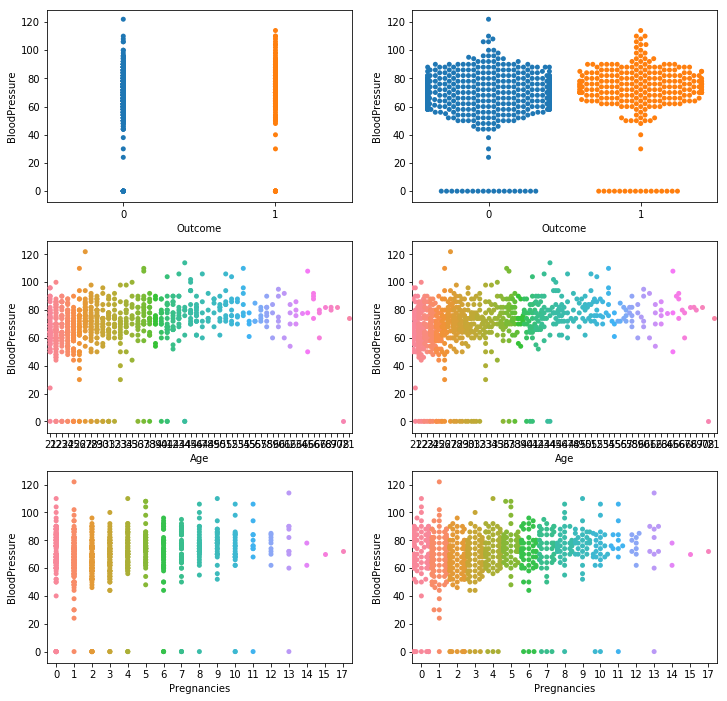

In [45]:
plt.figure(figsize = (12, 12))
plt.subplot(3,2,1)
sns.stripplot(y = 'BloodPressure', x = 'Outcome', data = df)
plt.subplot(3,2,2)
sns.swarmplot(y = 'BloodPressure', x = 'Outcome', data = df)
plt.subplot(3,2,3)
sns.stripplot(y = 'BloodPressure', x = 'Age', data = df)
plt.subplot(3,2,4)
sns.swarmplot(y = 'BloodPressure', x = 'Age', data = df)
plt.subplot(3,2,5)
sns.stripplot(y = 'BloodPressure', x = 'Pregnancies', data = df)
plt.subplot(3,2,6)
sns.swarmplot(y = 'BloodPressure', x = 'Pregnancies', data = df)

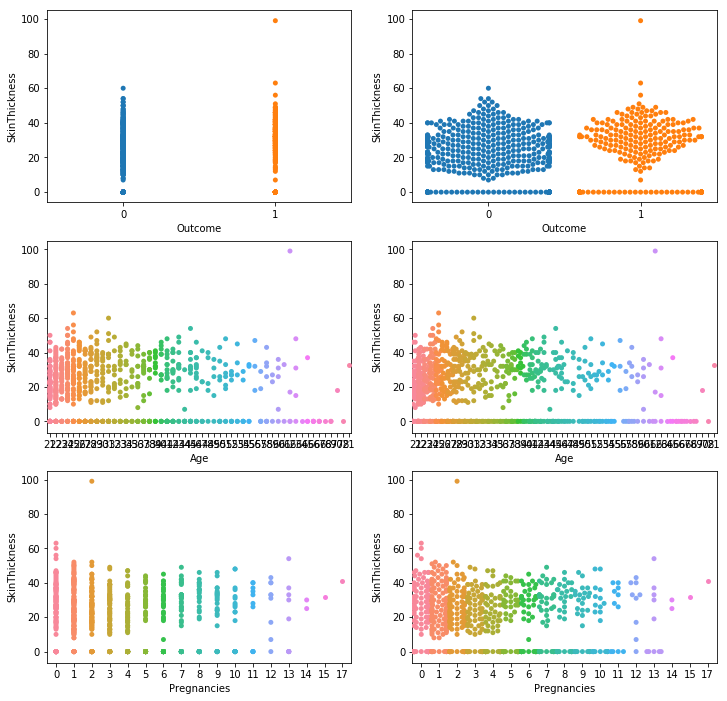

In [46]:
plt.figure(figsize = (12, 12))
plt.subplot(3,2,1)
sns.stripplot(y = 'SkinThickness', x = 'Outcome', data = df)
plt.subplot(3,2,2)
sns.swarmplot(y = 'SkinThickness', x = 'Outcome', data = df)
plt.subplot(3,2,3)
sns.stripplot(y = 'SkinThickness', x = 'Age', data = df)
plt.subplot(3,2,4)
sns.swarmplot(y = 'SkinThickness', x = 'Age', data = df)
plt.subplot(3,2,5)
sns.stripplot(y = 'SkinThickness', x = 'Pregnancies', data = df)
plt.subplot(3,2,6)
sns.swarmplot(y = 'SkinThickness', x = 'Pregnancies', data = df)

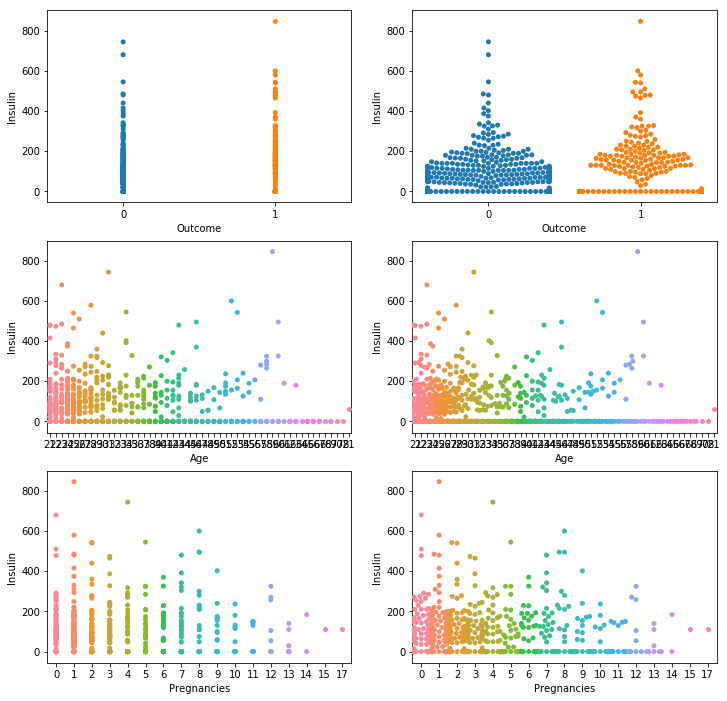

In [47]:
plt.figure(figsize = (12, 12))
plt.subplot(3,2,1)
sns.stripplot(y = 'Insulin', x = 'Outcome', data = df)
plt.subplot(3,2,2)
sns.swarmplot(y = 'Insulin', x = 'Outcome', data = df)
plt.subplot(3,2,3)
sns.stripplot(y = 'Insulin', x = 'Age', data = df)
plt.subplot(3,2,4)
sns.swarmplot(y = 'Insulin', x = 'Age', data = df)
plt.subplot(3,2,5)
sns.stripplot(y = 'Insulin', x = 'Pregnancies', data = df)
plt.subplot(3,2,6)
sns.swarmplot(y = 'Insulin', x = 'Pregnancies', data = df)

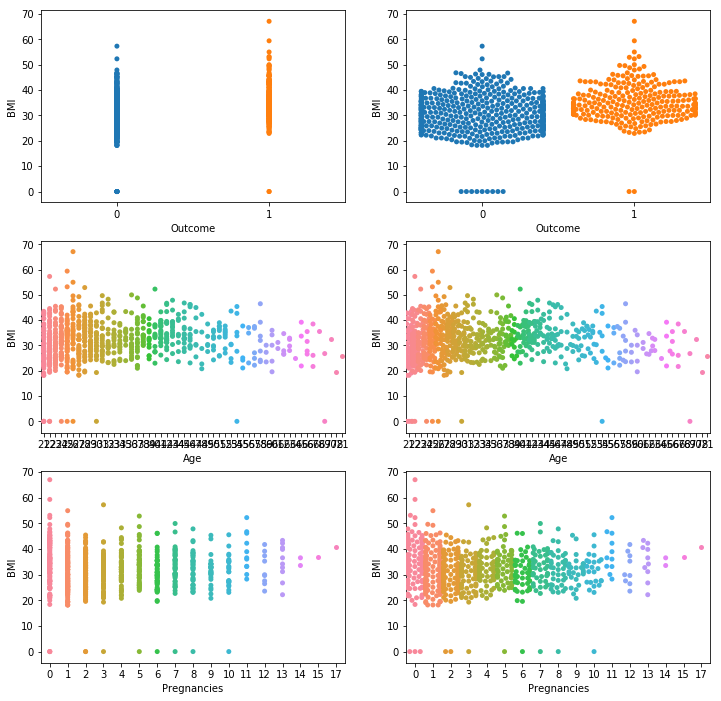

In [49]:
plt.figure(figsize = (12, 12))
plt.subplot(3,2,1)
sns.stripplot(y = 'BMI', x = 'Outcome', data = df)
plt.subplot(3,2,2)
sns.swarmplot(y = 'BMI', x = 'Outcome', data = df)
plt.subplot(3,2,3)
sns.stripplot(y = 'BMI', x = 'Age', data = df)
plt.subplot(3,2,4)
sns.swarmplot(y = 'BMI', x = 'Age', data = df)
plt.subplot(3,2,5)
sns.stripplot(y = 'BMI', x = 'Pregnancies', data = df)
plt.subplot(3,2,6)
sns.swarmplot(y = 'BMI', x = 'Pregnancies', data = df)

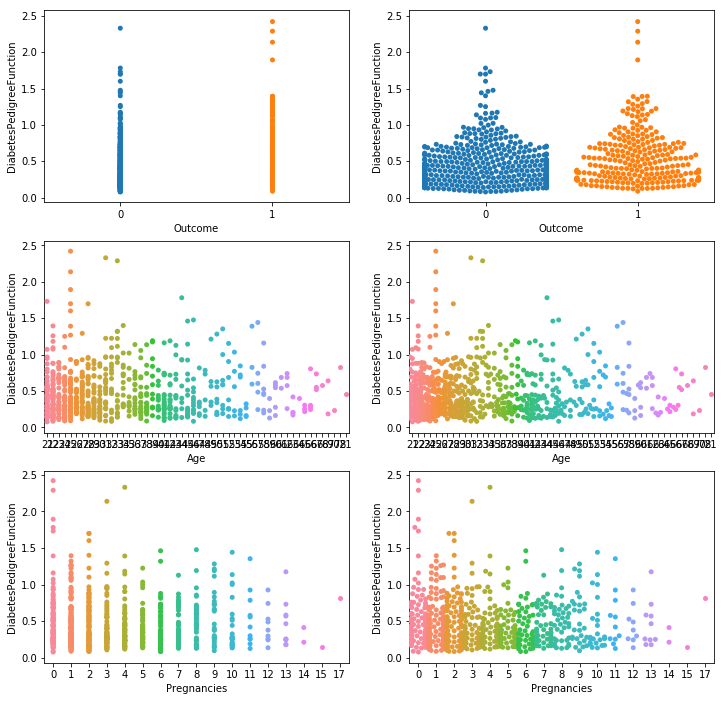

In [51]:
plt.figure(figsize = (12, 12))
plt.subplot(3,2,1)
sns.stripplot(y = 'DiabetesPedigreeFunction', x = 'Outcome', data = df)
plt.subplot(3,2,2)
sns.swarmplot(y = 'DiabetesPedigreeFunction', x = 'Outcome', data = df)
plt.subplot(3,2,3)
sns.stripplot(y = 'DiabetesPedigreeFunction', x = 'Age', data = df)
plt.subplot(3,2,4)
sns.swarmplot(y = 'DiabetesPedigreeFunction', x = 'Age', data = df)
plt.subplot(3,2,5)
sns.stripplot(y = 'DiabetesPedigreeFunction', x = 'Pregnancies', data = df)
plt.subplot(3,2,6)
sns.swarmplot(y = 'DiabetesPedigreeFunction', x = 'Pregnancies', data = df)

# TRAIN_TEST_SPLIT

In [73]:
#divide the dataset into training - 30%, tuneing -30% and testing 40%
from sklearn.model_selection import train_test_split as tts
train, test = tts(df,test_size=0.2)


In [75]:
train_x = train.loc[:,train.columns != 'Outcome']
test_x = test.loc[:,test.columns != 'Outcome']

train_y = train['Outcome']
test_y = test['Outcome']

# Using Decision Tree Algorithm

In [76]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4, random_state=0)
model.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Prediction

In [77]:
predicted = model.predict(test_x)

In [78]:
result = pd.DataFrame({'Actual':test_y , 'Predicted':predicted})
print(result)

     Actual  Predicted
627       0          0
535       1          1
760       0          0
140       0          0
42        0          0
186       1          1
578       0          1
582       0          1
317       1          1
212       0          1
356       1          0
384       0          0
523       1          1
736       0          0
200       0          0
533       0          0
354       0          0
364       0          1
690       0          0
697       0          0
479       0          1
698       0          0
695       1          1
510       1          0
595       1          1
420       0          0
277       0          0
431       0          0
715       1          1
448       1          0
..      ...        ...
231       1          1
632       0          0
71        0          0
392       0          0
661       1          1
663       1          1
462       0          0
143       1          1
399       1          1
585       0          0
169       0          1
336       0

# RESULT


In [80]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(test_y, predicted))
print(confusion_matrix(test_y, predicted))
print(accuracy_score(test_y, predicted))

             precision    recall  f1-score   support

          0       0.77      0.73      0.75        88
          1       0.66      0.71      0.69        66

avg / total       0.72      0.72      0.72       154

[[64 24]
 [19 47]]
0.7207792207792207


# Using KNN Algorithm

In [81]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [82]:
test_pred = kn.predict(test_x)

In [83]:
print(classification_report(test_y, test_pred))
print(confusion_matrix(test_y, test_pred))
print(accuracy_score(test_y, test_pred))

             precision    recall  f1-score   support

          0       0.69      0.78      0.73        88
          1       0.65      0.53      0.58        66

avg / total       0.67      0.68      0.67       154

[[69 19]
 [31 35]]
0.6753246753246753
